<a href="https://colab.research.google.com/github/esrayuzgec/AlzheimerDetection/blob/main/AlzheimersDetection4class_squeezenet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"esrayuzgec","key":"2c0e73f0e1cea2d8f9e56fba987e2376"}'}

In [3]:
!mkdir –p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600  ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d tourist55/alzheimers-dataset-4-class-of-images


 26% 9.00M/34.1M [00:01<00:04, 5.40MB/s]
100% 34.1M/34.1M [00:01<00:00, 22.1MB/s]


In [5]:
from zipfile import ZipFile
file_name="alzheimers-dataset-4-class-of-images.zip"

In [6]:
with ZipFile(file_name,'r') as zip:  #Zip halinde gelenn dosyayı  açtık
  zip.extractall()
  print('done')

done


In [7]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 719 kB 33.6 MB/s 
     |████████████████████████████████| 362 kB 61.0 MB/s 
     |████████████████████████████████| 1.2 MB 46.9 MB/s 
     |████████████████████████████████| 4.4 MB 55.7 MB/s 
     |████████████████████████████████| 212 kB 59.3 MB/s 
     |████████████████████████████████| 140 kB 50.8 MB/s 
     |████████████████████████████████| 1.1 MB 43.0 MB/s 
     |████████████████████████████████| 86 kB 321 kB/s 
     |████████████████████████████████| 596 kB 40.3 MB/s 
     |████████████████████████████████| 127 kB 60.1 MB/s 
     |████████████████████████████████| 144 kB 60.9 MB/s 
     |████████████████████████████████| 271 kB 15.1 MB/s 
     |████████████████████████████████| 94 kB 2.5 MB/s 
     |████████████████████████████████| 6.6 MB 54.9 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.

In [8]:
from fastai.vision.all import *
from fastai.vision.widgets import *
import PIL

In [9]:
train_dspath=Path("/content/Alzheimer_s Dataset/train")
train_dspath.ls()

(#4) [Path('/content/Alzheimer_s Dataset/train/ModerateDemented'),Path('/content/Alzheimer_s Dataset/train/NonDemented'),Path('/content/Alzheimer_s Dataset/train/VeryMildDemented'),Path('/content/Alzheimer_s Dataset/train/MildDemented')]

In [10]:
train_imfiles=get_image_files(train_dspath)

In [11]:
im=PILImage.create(train_imfiles[0])
im.shape

(208, 176)

In [12]:
augments=[RandomResizedCrop(size=224, min_scale=0.75), Rotate(), Zoom()]
item_tfms=Resize(128,method='squish')

In [13]:
brains=DataBlock(blocks=(ImageBlock,CategoryBlock),
                 get_y=parent_label,
                 batch_tfms=augments,
                 item_tfms=item_tfms,
                 splitter=RandomSplitter(valid_pct=0.2,seed=23)
                 
                 
                 )

In [14]:
dls=brains.dataloaders(train_imfiles,bs=64)

In [15]:
dls.c,len(dls.train_ds),len(dls.valid_ds)#valid ve train data sayımız

(4, 4097, 1024)

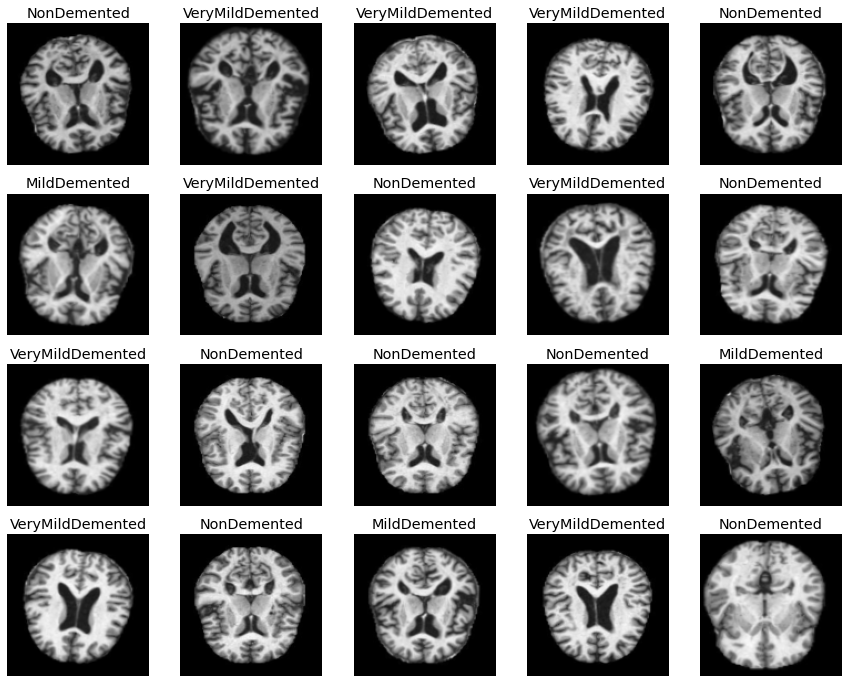

In [16]:
dls.show_batch(max_n=20)

In [18]:

learn=cnn_learner(dls,squeezenet1_0,pretrained = True,metrics=[accuracy,error_rate])

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:265: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/squeezenet1_0-b66bff10.pth" to /root/.cache/torch/hub/checkpoints/squeezenet1_0-b66bff10.pth


  0%|          | 0.00/4.78M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


SuggestedLRs(valley=0.0014454397605732083)

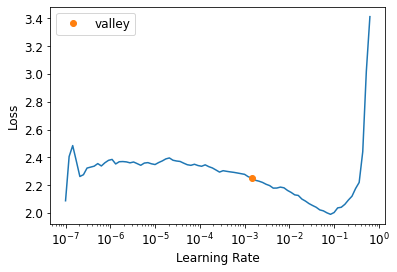

In [19]:
learn.lr_find()

In [20]:
learn.fit_one_cycle(100,2.2e-3)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,2.076162,1.572032,0.402344,0.597656,00:10
1,1.841012,1.338831,0.487305,0.512695,00:10
2,1.684578,1.211045,0.519531,0.480469,00:10
3,1.513971,1.086433,0.587891,0.412109,00:10
4,1.350004,0.952705,0.603516,0.396484,00:10
5,1.237425,0.833966,0.660156,0.339844,00:11
6,1.100347,0.803729,0.668945,0.331055,00:10
7,1.010742,0.758976,0.704102,0.295898,00:12
8,0.941661,0.678761,0.709961,0.290039,00:12
9,0.831395,0.661705,0.721680,0.278320,00:10


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


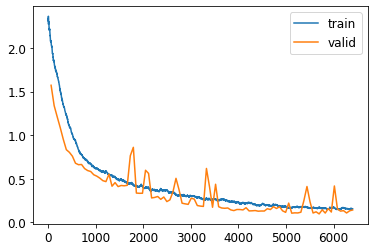

In [21]:
learn.recorder.plot_loss()

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


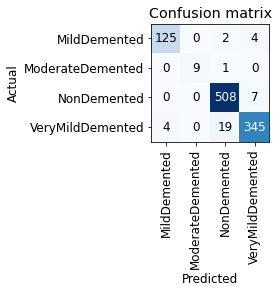

In [22]:
interp=ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


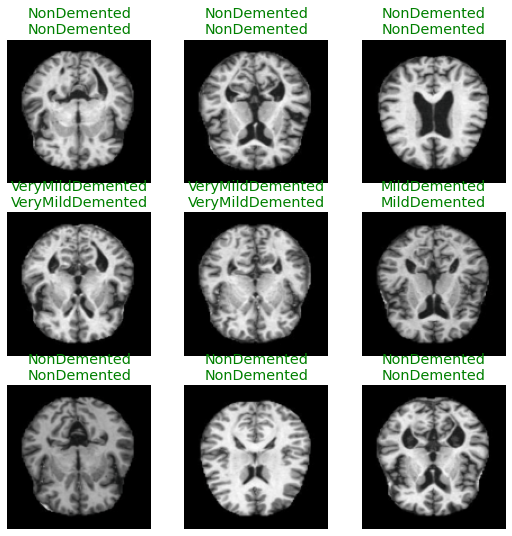

In [23]:
learn.show_results()

In [24]:
learn.summary()

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


Sequential (Input shape: 64 x 3 x 128 x 128)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 96 x 61 x 61   
Conv2d                                    14208      False     
ReLU                                                           
____________________________________________________________________________
                     64 x 96 x 30 x 30   
MaxPool2d                                                      
____________________________________________________________________________
                     64 x 16 x 30 x 30   
Conv2d                                    1552       False     
ReLU                                                           
____________________________________________________________________________
                     64 x 64 x 30 x 30   
Conv2d                                    1088       False     
ReLU                                                           
Conv2d                                    92

In [25]:
interp.print_classification_report()

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


                  precision    recall  f1-score   support

    MildDemented       0.97      0.95      0.96       131
ModerateDemented       1.00      0.90      0.95        10
     NonDemented       0.96      0.99      0.97       515
VeryMildDemented       0.97      0.94      0.95       368

        accuracy                           0.96      1024
       macro avg       0.97      0.94      0.96      1024
    weighted avg       0.96      0.96      0.96      1024



In [26]:
from fastai.vision.widgets import * 
from fastai.vision.all import *
from PIL import Image, ImageOps, ImageEnhance, __version__ as PILLOW_VERSION

In [27]:
btn_upload=widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

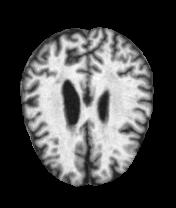

In [36]:
img=PILImage.create(btn_upload.data[-1])
img

In [37]:
learn.predict(img)[0]

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


'NonDemented'